## What is sentiment analysis?

#### Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

### In this Report, we are going to do the Sentiment Analysis on Afghanistan and Taliban case

#### We have gather almost 13208 Tweets related to our topic using tweepy by doing Live Streaming

#### Without wating our more time, Le's get started with our Analysis work

### Importing Neccessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
import tweepy
from tweepy import OAuthHandler, Stream, StreamListener
import json
import nltk # used for building Python programs that work with human language data
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

### Storing required keys to access the twitter data

In [3]:
consumer_key = "a56ytfRblt7pWrUNLpuG9Wz9K"
consumer_token = "vWuukLLDPAVcAoxPMDSot5upNrRnG68i5Ag2qn0uVdmcE78zqf"

access_key = "1219331925841563649-M8BuIOcJwclwv7oqchg81q6tEvgHeq"
access_token = "tq5Oj2cAiYsnX2EXGHPrGbEsmqquvd7xe7MjDET3xSxrD"

### Creating the object of OAuthHandler and setting the access token¶


In [4]:
auth = OAuthHandler(consumer_key, consumer_token)
auth.set_access_token(access_key, access_token)

#### Now, here our main work will get started.¶

**Firstly, we will create a class which will going to inherit StreamListener class which will going to help us in getting the stream data related to any topic, an dwill save that data in a text file.**

**Secondly, we will create the object of the created class and Stream class. In Stream class we will pass two object:**

   1. Object of OAuthHandler class 
   2. Object of Created class

**Finally, we will filter our tweets by giving track, which means by giving our related topic.**

In [5]:
class MyStream(StreamListener):
    def on_data(self, tweet):
        with open("tweets.txt", 'a') as fp:
            fp.write(tweet)
            fp.write("\n")
            
obj = MyStream()
st = Stream(auth, obj)
st.filter(track=['taliban','afghanistan','kabul','taliban and afghanistan'])

KeyboardInterrupt: 

In [6]:
# Checking how many line do we have in our text file
with open("tweets.txt") as fp:
    print(len(fp.readlines()))

40155


In [7]:
# Converting string data into json format and storing it into a list
all_tweets = []
with open("tweets.txt") as fp:
    for i in fp.readlines():
        try:
            all_tweets.append(json.loads(i))
        except:
            pass

In [8]:
# Total tweets we got
len(all_tweets)

13385

In [9]:
# Checking one of the tweet
all_tweets[10]

{'created_at': 'Thu Aug 26 18:25:24 +0000 2021',
 'id': 1430959578397749252,
 'id_str': '1430959578397749252',
 'text': 'RT @RealJamesWoods: While this is horrific to behold, it is a direct consequence of having an administration more concerned with pronouns t…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1249480661250879488,
  'id_str': '1249480661250879488',
  'name': 'LQneStarButterfly',
  'screen_name': 'LQneStarBttrfly',
  'location': None,
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 228,
  'friends_count': 404,
  'listed_count': 0,
  'favourites_count': 43549,
  'statuses_count': 11545,
  'created_at': 'Sun Apr 12 23:33:40 +0000 2020',
  'u

In [10]:
# Saving the text of all the tweets in a list 
tweets = []
for i in all_tweets:
    try:
        tweets.append(i['text'].lower())
    except:
        pass

In [11]:
# Once again checking the length of tweets for our confirmation that we got the data properly
len(tweets)

13127

#### Setting some parameters related to figures¶

In [12]:
plt.rcParams['figure.figsize'] = 10,6
plt.rcParams['figure.dpi'] = 100

In [14]:
# Top 10 Tweets reads:
for i,j in enumerate(tweets[:10]):
    print()
    print(f"Tweet {i+1}. -->\n\n{j}")
    print("__"*60)


Tweet 1. -->

rt @meghupdates: input alert: hundreds of isis ter0rists reportedly near kabul airport
________________________________________________________________________________________________________________________

Tweet 2. -->

rt @vmkellervanessa: here you go hr mcmaster. remember this?? https://t.co/rjnf4aifbm
________________________________________________________________________________________________________________________

Tweet 3. -->

rt @gretathunberg: if there's anyone who can help in anyway to evacuate the fridays for future activists from afghanistan - please reach ou…
________________________________________________________________________________________________________________________

Tweet 4. -->

rt @rahulroushan: the crucial difference between taliban and isis https://t.co/w92qevwymn
________________________________________________________________________________________________________________________

Tweet 5. -->

praying for afghanistan, our troops a

In [15]:
# Collecting all the words used in all the gather tweets in a list
l = []
for i in tweets:
    l.extend(i.split())
# Total words we got from 2746 tweets
print(len(l))

242098


In [16]:
# Converting list of tweet words into series for value counts
tweet_word_series = pd.Series(l)

# Performing value counts on tweet_word_series to get the idea of words used
tweet_word_series.value_counts()

rt                         9867
the                        8523
in                         5750
of                         3616
to                         3563
                           ... 
@sykescharlie:                1
dunno,                        1
jammu,                        1
https://t.co/j8kcmx6rv2       1
القديمة                       1
Length: 29571, dtype: int64

In [17]:
word=[]
for i in  tweet_word_series:
    if 'a'<=i<='z' or "A"<=i<="Z" :
        word.append(i)

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
eng_sr1 = []
for i in word:
    if i not in stopwords.words('english'):
        eng_sr1.append(i)

In [20]:
#common english words
pd.Series(eng_sr1).value_counts()[:10]

rt             9867
kabul          2974
afghanistan    1822
us             1703
killed         1518
taliban        1258
least          1151
airport        1092
de             1031
biden           956
dtype: int64

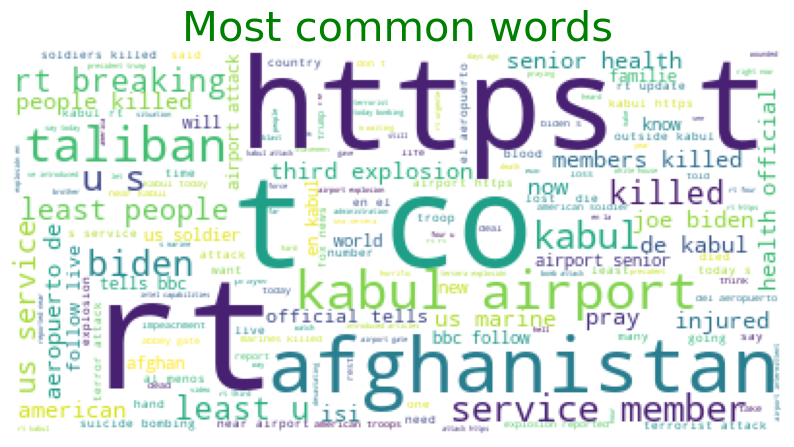

In [32]:
# Wordcloud of most common words
words = " ".join(word)

# Setting stopwords
stopwords = set(STOPWORDS)



# Now, as we have a string  of words. Its time to create a wordcloud object
wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 42).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud)
plt.title('Most common words', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

# Working with Hashtags


#### Let's take out hashtags from the every tweet details and store it is a list

In [ ]:
hashtags = []
for t in all_tweets:
    try:
        h = t['entities']['hashtags']
        if h:
            for i in h:
                hashtags.append(i['text'].lower().strip())
    except:
        pass

#### Converting the list into series so that we can perform different operation on it

In [ ]:
# Converting list inot series
hashtags_sr = pd.Series(hashtags)

#### Let's check the Top 10 common words used in Hashtags

In [ ]:
hashtags_sr.value_counts()[:10]

## Let's check the frequency of all the words used in Hashtags through WordCloud

In [ ]:
# Wordcloud of most common words in hashtags
data = hashtags_sr.value_counts()

# Now, as we have a string  of words. Its time to create a wordcloud object
wordcloud = WordCloud(background_color="white",colormap='Dark2', max_font_size=300).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.title('Most common words in all the hashtags', fontdict={'size': 30, 'color':'green','verticalalignment': 'bottom'})
plt.axis('off')
plt.show()

### Working with the Locations¶


#### Let's take out location from every tweet details and store it is a list



In [22]:
# Taking out locations of all the twwets users
loc = []
for i in all_tweets:
    try:
        if i['user']['location'] == None:
            pass
        else:
            loc.append(i['user']['location'])
            
    except:
        pass

#### Converting list of locations into series from performing differnt operation

In [23]:
# Converting list into series
loc_sr = pd.Series(loc)

### Let's check the Top 10 common Locations

In [24]:
loc_sr.value_counts()[:10]

United States       244
USA                 128
India               116
Texas, USA           86
Florida, USA         83
Washington, DC       70
California, USA      50
New Delhi, India     48
Pakistan             41
Los Angeles, CA      39
dtype: int64

### Let's check the frequency of all the Locations through WordCloud


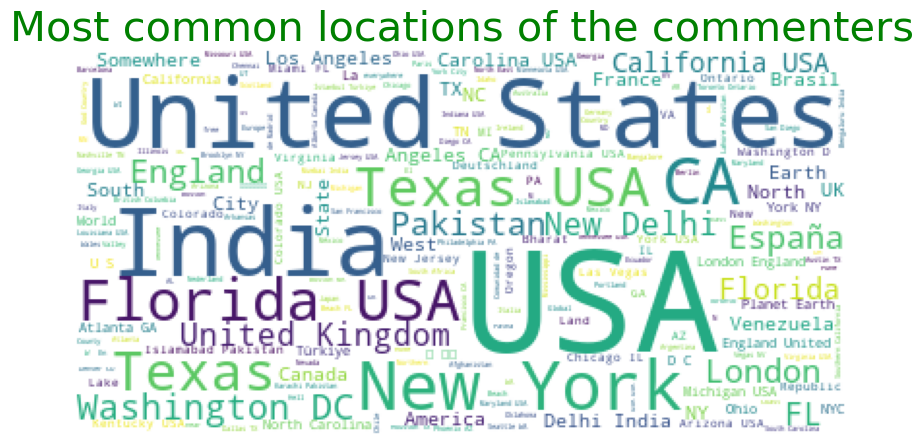

In [25]:
# Now, as we have a string  of words. Its time to create a wordcloud object
words = " ".join(loc)

# Setting stopwords
stopwords = set(STOPWORDS)

# Creating object of the wordcloud
wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(words)

# Generate a wordcloud
figure_size=(10.0,10.0)
plt.figure(figsize=figure_size)
plt.imshow(wordcloud)
plt.title('Most common locations of the commenters', fontdict={'size': 30, 'color':'green'})
plt.axis('off')
plt.show()

### Working with Retweets Counts

#### Let's take out Retweet counts from every tweet details and store it is a list



In [26]:
all_tweets[2]

{'created_at': 'Thu Aug 26 18:25:24 +0000 2021',
 'id': 1430959578351644676,
 'id_str': '1430959578351644676',
 'text': "RT @GretaThunberg: If there's anyone who can help in anyway to evacuate the Fridays For Future activists from Afghanistan - please reach ou…",
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 3320658622,
  'id_str': '3320658622',
  'name': 'mandarina',
  'screen_name': 'sontaca22',
  'location': None,
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 161,
  'friends_count': 682,
  'listed_count': 0,
  'favourites_count': 23858,
  'statuses_count': 8763,
  'created_at': 'Fri Jun 12 09:27:50 +0000 2015',
  'utc_offset': None,
  'time_zone': None,
  'geo_

In [27]:
retweet = []
count = []
for i in all_tweets:
    try:
        if i['retweeted_status']['retweet_count']:
            t = i['text']
            if t not in retweet:
                count.append(i['retweeted_status']['retweet_count'])
                retweet.append(i['text']) 
            else:
                pass            
    except:
        pass

#### As we have two list,lets convert it into a dataframe consists of retweet and their counts



In [28]:
df = pd.DataFrame(list(zip(retweet, count)),columns =['Retweet', 'Count'])

In [29]:
for no,i in enumerate(df.sort_values(ascending = False,by='Count')[:10].values):
    print(f"{no+1}. Tweet -->")
    print()
    print(f"{i[0]}")
    print()
    print(f"Count --> {i[1]}")
    print("__"*60)
    print()

1. Tweet -->

RT @wikileaks: Julian Assange speaking in 2011: "The goal is to use Afghanistan to wash money out of the tax bases of the US and Europe thr…

Count --> 46331
________________________________________________________________________________________________________________________

2. Tweet -->

RT @Malala: We watch in complete shock as Taliban takes control of Afghanistan. I am deeply worried about women, minorities and human right…

Count --> 31047
________________________________________________________________________________________________________________________

3. Tweet -->

RT @LuGuangMing: You're not going to whitewash 20 years of brutal occupation with these cheap propaganda pictures. https://t.co/C1hrSK6MRa

Count --> 20609
________________________________________________________________________________________________________________________

4. Tweet -->

RT @sbasijrasikh: In March 2002, after the fall of Taliban, thousands of Afghan girls were invited to go t

**As of now, we are much aware of our data, as we have checked every possible details related to our tweets. So, let's move futher and do our main task of doing sentiment analysis of tweets.**

**We are going to check wether a tweet is positive, negative or neutral by checking the polarity of each tweet. if the polarity is equal to zero than the sentiment is nuetral, if polarity is greater than zero than the sentiment is positive and if polarity is less than zero than the sentiment is negtive.**


### Let's start with Sentiment Analysis

**Here, we are going to collect tweets with positive,negative and neutral polarity in different lists.**

In [30]:
positive=[]
negative=[]
neutral=[]
for t in tweets:
    a = TextBlob(t)
    if a.sentiment.polarity == 0:
        neutral.append(t)
    elif a.sentiment.polarity < 0:
        negative.append(t)
    else:
        positive.append(t)
    

In [31]:
print("Total Tweets: ",len(tweets))
print(f"Total Positive Tweets are {len(positive)} which is  {round(len(positive)/len(tweets)*100,2)} %" )
print(f"Total Negative Tweets are {len(negative)} which is  {round(len(negative)/len(tweets)*100,2)} %" )
print(f"Total Neutral Tweets are {len(neutral)} which is  {round(len(neutral)/len(tweets)*100,2)} %" )

Total Tweets:  13127
Total Positive Tweets are 3013 which is  22.95 %
Total Negative Tweets are 4058 which is  30.91 %
Total Neutral Tweets are 6056 which is  46.13 %


In [34]:
# printing first 10 positive tweets
print("\n\nPositive tweets:")
print("_"*16)
for no,tweet in enumerate(positive[:10]):
    print("\n")
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Positive tweets:
________________


Tweet 1. --> 

rt @meghupdates: input alert: hundreds of isis ter0rists reportedly near kabul airport
________________________________________________________________________________________________________________________


Tweet 2. --> 

rt @emilia26774099: 11 or more  u.s. service members have been killed in kabul. 

biden, you’re a treasonous incoherent bastard.
________________________________________________________________________________________________________________________


Tweet 3. --> 

rt @disclosetv: just in - italian c-130 had to fly an evasive maneuver after takeoff from #kabul airport due to gunfire from the ground.
________________________________________________________________________________________________________________________


Tweet 4. --> 

rt @seanmdav: as you watch the completely avoidable insanity unfold in afghanistan, keep in mind that they impeached trump over a phone cal…
_______________________________________

In [36]:
# printing first 10 negative tweets
print("\n\nNegative tweets:")
print("_"*16)
for no,tweet in enumerate(negative[:10]):
    print("\n")
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Negative tweets:
________________


Tweet 1. --> 

not happy!
________________________________________________________________________________________________________________________


Tweet 2. --> 

rt @realjameswoods: while this is horrific to behold, it is a direct consequence of having an administration more concerned with pronouns t…
________________________________________________________________________________________________________________________


Tweet 3. --> 

rt @globalelephants: the staff at the kabul small animal rescue is attempting to fundraise at least $1.5 million for a cargo plane that can…
________________________________________________________________________________________________________________________


Tweet 4. --> 

rt @actbrigitte: at least 10 us service members have been killed in kabul now.

my heart is broken for their loved ones. my heart is broken…
___________________________________________________________________________________________________

In [37]:
# printing first 10 negative tweets
print("\n\nNeutral tweets:")
print("_"*16)
for no,tweet in enumerate(neutral[:10]):
    print()
    print(f"Tweet {no+1}. --> \n\n{tweet}")
    print("__"*60)



Neutral tweets:
________________

Tweet 1. --> 

rt @vmkellervanessa: here you go hr mcmaster. remember this?? https://t.co/rjnf4aifbm
________________________________________________________________________________________________________________________

Tweet 2. --> 

rt @gretathunberg: if there's anyone who can help in anyway to evacuate the fridays for future activists from afghanistan - please reach ou…
________________________________________________________________________________________________________________________

Tweet 3. --> 

rt @rahulroushan: the crucial difference between taliban and isis https://t.co/w92qevwymn
________________________________________________________________________________________________________________________

Tweet 4. --> 

praying for afghanistan, our troops and fellow americans in harms way.  #kabulaiport https://t.co/avyycvnigf
________________________________________________________________________________________________________________

## Conclusion

***
**We have checked all the data related to our tweets.**

**We tried to take out as much as insites from the data, so that we can clearly understood our data..**

We also done sentiment analysis of our tweets by using the polarity of sentiments.**

Hope, you liked it

***